In [15]:
import pandas as pd

df = pd.read_csv("classification.csv")

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [16]:
from sklearn.model_selection import train_test_split

X = df[["age", "interest"]].values

Y = df["success"].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.25)

In [17]:
# Entscheidungsbäume benätigen keinen StandardScaler also keine skalierten Daten
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [33]:
# Parameter Criterion auf entropy setzen
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = "entropy", max_depth = 4, min_samples_leaf = 3)
model.fit(X_train, Y_train)

print(model.score(X_test, Y_test))

0.9333333333333333


In [34]:
from sklearn.tree import export_graphviz

tree = export_graphviz(model, None,
                       feature_names = ["age", "interest"], 
                       class_names = ["nicht gekauft", "gekauft"],
                       rounded = True,
                       filled = True)
# print(tree)

In [42]:
# Exportieren in eine Bilddatei 
import graphviz

src = graphviz.Source(tree, format = "png")

src.render("datei.png")

'datei.png.png'

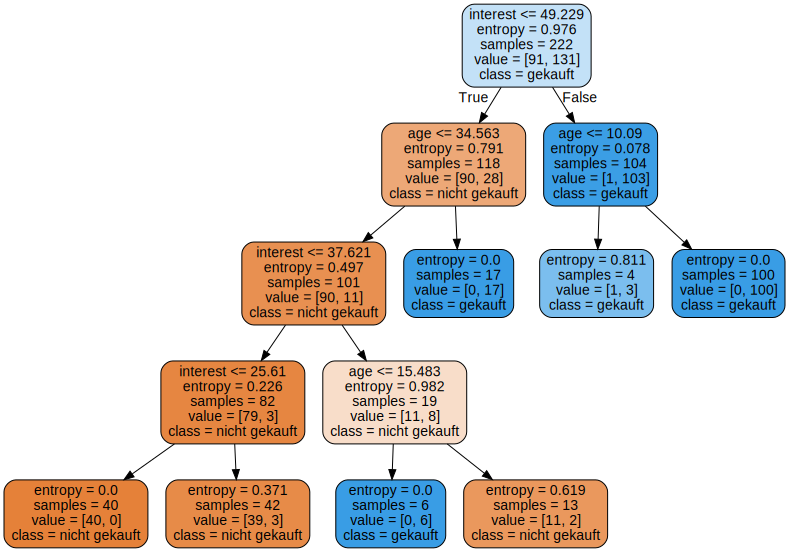

In [43]:
src

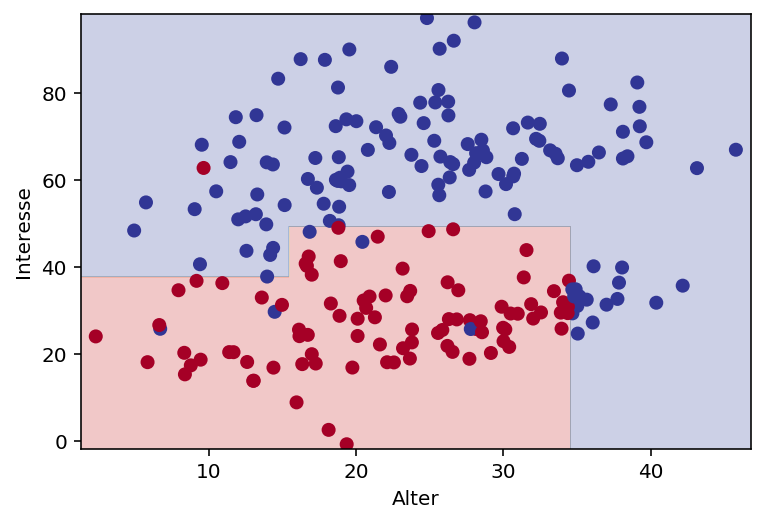

In [36]:
# Die Linien in den Farben zeigen, dass der Baum overfittet ist
# Lösung Baum kürzen/beschränken auf Höhe und Breite
from helper import plot_classifier

# Trainingsdaten plotten
plot_classifier(model, X_train, Y_train, proba = False, xlabel = "Alter", ylabel = "Interesse")

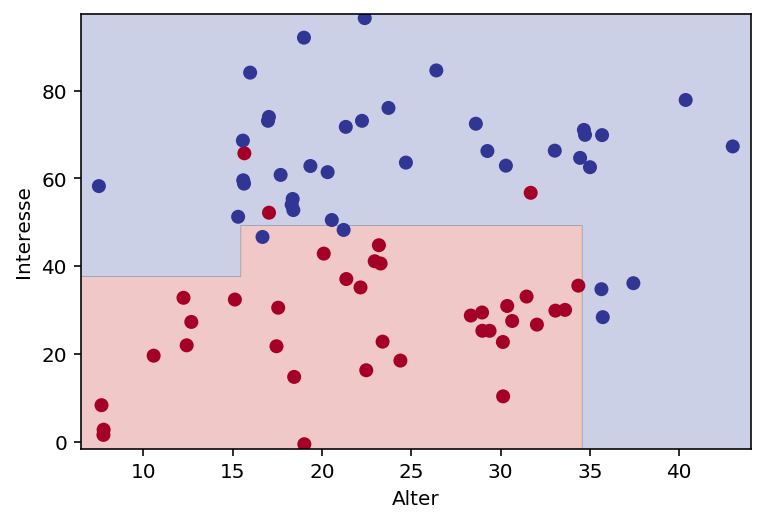

In [37]:
# Testdaten plotten
plot_classifier(model, X_test, Y_test, proba = False, xlabel = "Alter", ylabel = "Interesse")

In [38]:
model.predict_proba(X_test)

array([[0.        , 1.        ],
       [0.92857143, 0.07142857],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.84615385, 0.15384615],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.92857143, 0.07142857],
       [1.        , 0.        ],
       [0.92857143, 0.07142857],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.92857143, 0.07142857],
       [0.        , 1.        ],
       [0.84615385, 0.15384615],
       [0.92857143, 0.07142857],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

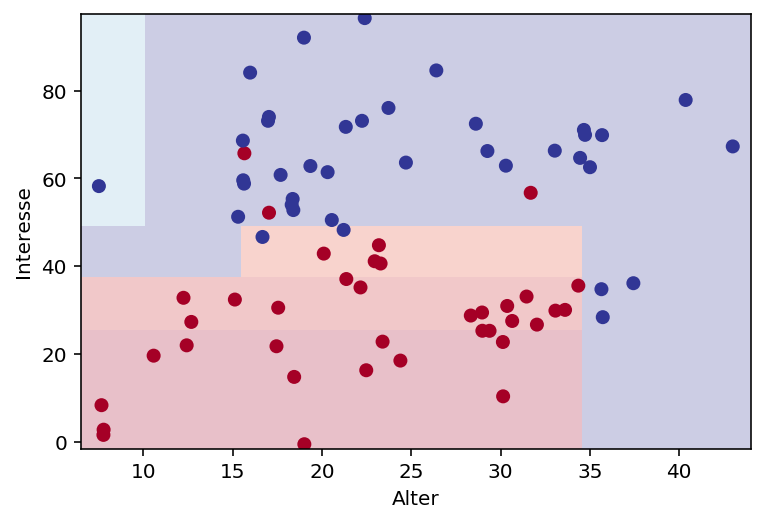

In [40]:
# Bei Entscheidungsbäumen gibt es keine fließende Übergänge wie bei anderen Modellen
plot_classifier(model, X_test, Y_test, proba = True, xlabel = "Alter", ylabel = "Interesse")